## Unsupervised Learning with k-Means clustering

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

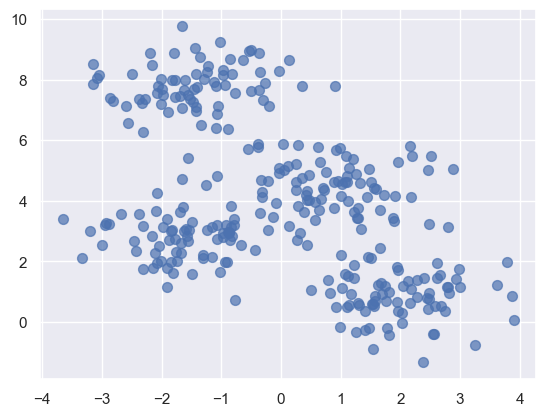

In [2]:
from sklearn.datasets import make_blobs

points, cluster_indexes = make_blobs(
    n_samples=300, centers=4, cluster_std=0.8, random_state=0
)

x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y, s=50, alpha=0.7);

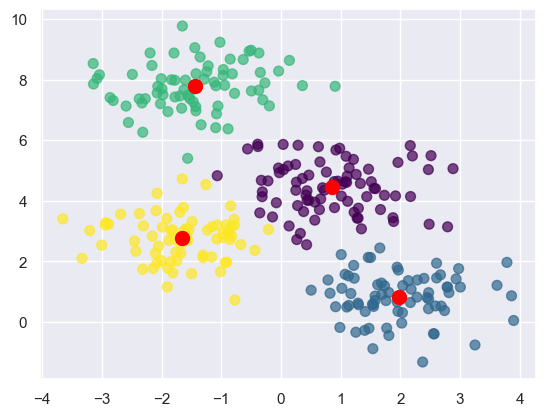

In [3]:
from sklearn.cluster import KMeans

# Here we set the number of clusters to 4.
# This may not be optimal.
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)

predicted_cluster_indexes = kmeans.predict(points)
plt.scatter(x, y, c=predicted_cluster_indexes, s=50, alpha=0.7, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100);

Picking the right number of clusters with the _elbow method_.

The _elbow method_ plots inertias (the sum of squared distances of the data points to the closest cluster center) as a function of cluster counts.

The best number of cluster can be determined by looking for the sharpest elbow in the curve (red vertical line in the plot below).

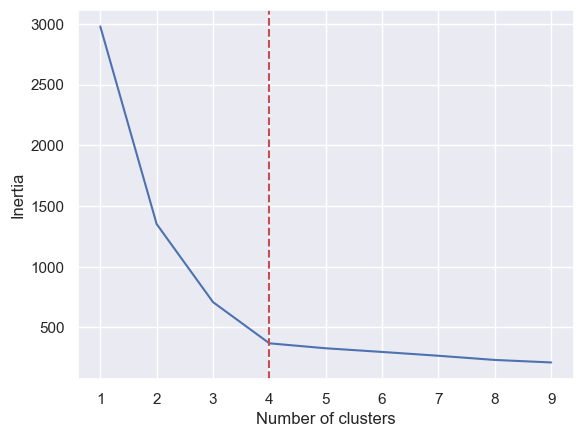

In [4]:
inertias = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.axvline(4, linestyle="--", c="r");

## Applying k-Means Clustering to Customer Data

In [5]:
import pandas as pd

customers = pd.read_csv("customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

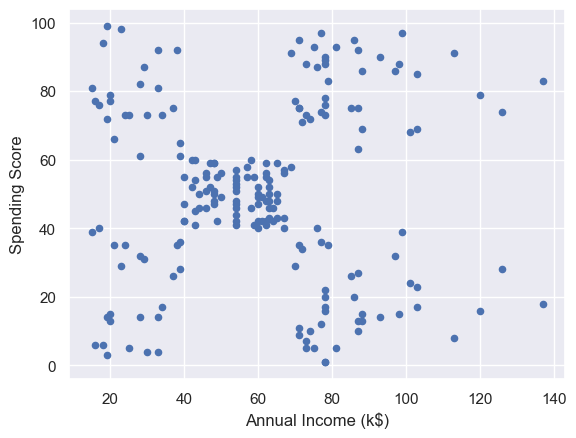

In [7]:
customers.plot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    ylabel="Spending Score",
    style=dict(s=50, alpha=0.7),
    kind="scatter",
);

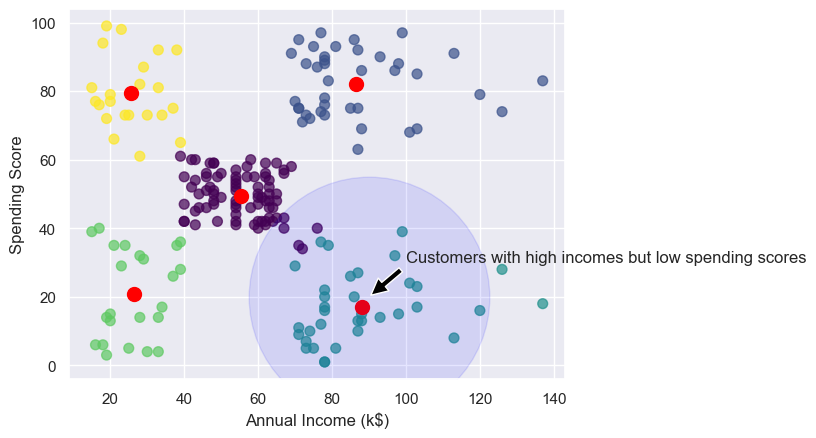

In [20]:
from sklearn.cluster import KMeans

points = customers[["Annual Income (k$)", "Spending Score (1-100)"]].values
x = points[:, 0]
y = points[:, 1]

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(
    x, y, c=list(map(int, predicted_cluster_indexes)), s=50, alpha=0.7, cmap="viridis"
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100)

plt.scatter(90, 20, 30000, color="blue", alpha=0.1)
plt.annotate(
    "Customers with high incomes but low spending scores",
    xy=(90, 20),
    xytext=(100, 30),
    arrowprops=dict(facecolor="black", shrink=0.05),
);

In [9]:
df = customers.copy()
df["Cluster"] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [10]:
import numpy as np

# Get the cluster index for a customer with a high income and low spending score.
cluster = kmeans.predict(np.array([[120, 20]]))[0]

# Filter the DataFrame to include only customes in that cluster.
clustered_df = df[df["Cluster"] == cluster]

# Show the customer IDs.
clustered_df["CustomerID"].values

array([125, 129, 131, 135, 137, 139, 141, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199])

## Segmenting customers using more than two dimensions

In [11]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [12]:
encoder.classes_

array(['Female', 'Male'], dtype=object)

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

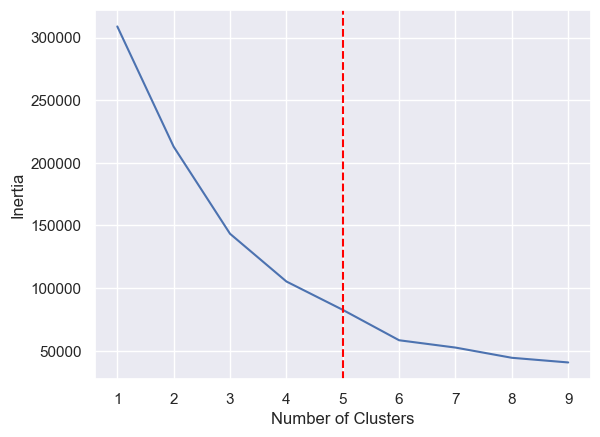

In [14]:
# Always define the columns we are working with.
points = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.axvline(5, linestyle="--", c="red");

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

KMeans(n_clusters=5, random_state=0)

In [16]:
df["Cluster"] = kmeans.predict(points)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0


In [17]:
results = pd.DataFrame(
    columns=[
        "Cluster",
        "Average Age",
        "Average income",
        "Average Spending Index",
        "Number of Females",
        "Number of Males",
    ]
)

for i, center in enumerate(kmeans.cluster_centers_):
    age = center[1]  # Average age for current cluster
    income = center[2]  # Average income for current cluster
    spend = center[3]  # Average spending score for current cluster

    gdf = df[df["Cluster"] == i]  # Group DataFrame
    females = gdf[gdf["Gender"] == 0].shape[0]  # See LabelEncoder().classes_
    males = gdf[gdf["Gender"] == 1].shape[0]
    results.loc[i] = [i, age, income, spend, females, males]

results.head()

,Cluster,Average Age,Average income,Average Spending Index,Number of Females,Number of Males
0,0.0,54.060000,40.460000,36.720000,28.0,22.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,25.250000,25.833333,76.916667,14.0,10.0
3,3.0,41.647059,88.735294,16.764706,15.0,19.0
4,4.0,33.396226,58.056604,48.773585,34.0,19.0


In [18]:
# Target customers with high incomes, but low spending scores for a promotion.
results.style.map(
    lambda _: f"background-color: rgba(255, 0, 0, 0.2)",
    subset=(results.index[3],),
)

,Cluster,Average Age,Average income,Average Spending Index,Number of Females,Number of Males
0,0.000000,54.060000,40.460000,36.720000,28.000000,22.000000
1,1.000000,32.692308,86.538462,82.128205,21.000000,18.000000
2,2.000000,25.250000,25.833333,76.916667,14.000000,10.000000
3,3.000000,41.647059,88.735294,16.764706,15.000000,19.000000
4,4.000000,33.396226,58.056604,48.773585,34.000000,19.000000


In [19]:
# Some of the biggest spenders are young people with modest incomes.
results.style.map(
    lambda _: f"background-color: rgba(0, 255, 0, 0.2)",
    subset=(results.index[2],),
)

,Cluster,Average Age,Average income,Average Spending Index,Number of Females,Number of Males
0,0.000000,54.060000,40.460000,36.720000,28.000000,22.000000
1,1.000000,32.692308,86.538462,82.128205,21.000000,18.000000
2,2.000000,25.250000,25.833333,76.916667,14.000000,10.000000
3,3.000000,41.647059,88.735294,16.764706,15.000000,19.000000
4,4.000000,33.396226,58.056604,48.773585,34.000000,19.000000
